In [1]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()
from matplotlib import cm
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d, Axes3D

N = 60
show_fig = 1
plt.close('all')

clear = "\n" * 25
print(clear)

from IPython import get_ipython


def __reset__(): get_ipython().magic('reset -sf')


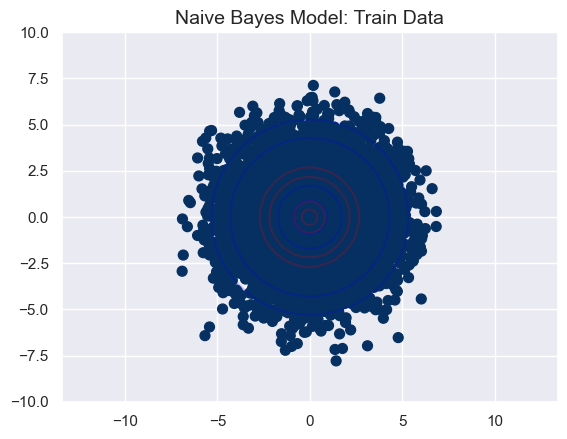

<Figure size 640x480 with 0 Axes>

In [2]:
# %%2D Gaussian
#X1, X2 = np.mgrid[-3:3:6/N, -3:3:6/N]
#P = np.dstack((X1, X2))
#rv = multivariate_normal( mean=[0,0], cov=[1,1]);
#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111)
#ax2.contourf(X1, X2, rv.pdf(P))

mu       = [0,0]
c1_sigma = [[1,0],[0,1]]
c2_sigma = [[4,0],[0,4]]
Nsamp    = 10000

X_C1 = np.random.multivariate_normal(mu, c1_sigma, Nsamp)
y1    = np.zeros((X_C1.shape[0],1),dtype=int)

X_C2 = np.random.multivariate_normal(mu, c2_sigma, Nsamp)
y2    = np.ones((X_C2.shape[0],1),dtype=int)

X = np.vstack((X_C1,X_C2))
y = np.array(np.vstack((y1,y2)))
y = y.reshape((y.shape[0],))

xlim = (-10, 10)
ylim = (-10, 10)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 60)
xx, yy = np.meshgrid(xg, yg)

if show_fig:
    fig, ax = plt.subplots()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model: Train Data', size=14)


    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
    mu_list=np.empty((0,2),dtype='float64');
    std_list=np.empty((0,2),dtype='float64');
    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mu, std = X[mask].mean(0), X[mask].std(0)
        mu_list=np.vstack((mu_list,mu))
        std_list=np.vstack((std_list,std))
        P = np.exp(-0.5 *(Xgrid - mu) ** 2 / std ** 2).prod(1) #-0.5 * (1/(np.sqrt(2*math.pi)*std.prod(0)))*
        Pm = np.ma.masked_array(P, P < 0.03)
        ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                      cmap=color.title() + 's')
        ax.contour(xx, yy, P.reshape(xx.shape),
                   levels=[0.03, 0.1, 0.69, 0.9],
                   colors=color, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)
    plt.axis('equal')
    fig.savefig('gaussian-NB-neq-var-Train_data.png')


# 3D Gaussian plot
fig = plt.figure()
ax = Axes3D(fig)
for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mu, std = X[mask].mean(0), X[mask].std(0)
        Pm = np.ma.masked_array(P, P < 0.03)
        P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1) # (1/(np.sqrt(2*math.pi)*std.prod(0)))*
        # rgb = ls.shade(P.reshape(xx.shape), plt.cm.RdYlBu)
        ax.plot_surface(xx,yy,P.reshape(xx.shape), rstride=1, cstride=1, linewidth=1, antialiased=False,
                cmap="autumn_r")
        ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
        ax.contour(xx, yy, P.reshape(xx.shape),
                    levels=[0.1, 0.5, 0.9],colors=color, linestyles="solid",offset=-0.2)#
                    #colors=color, alpha=0.2)
ax.set_zlim(0,1)
ax.set_zticks(np.linspace(0,0.1,1))

ax.view_init(-10, 0)
# for angle in range(0,360,10):
#     ax.view_init(-20, angle)
#     plt.draw()
#     plt.pause(.001)
plt.show()

In [3]:
model = GaussianNB()
model.fit(X, y);

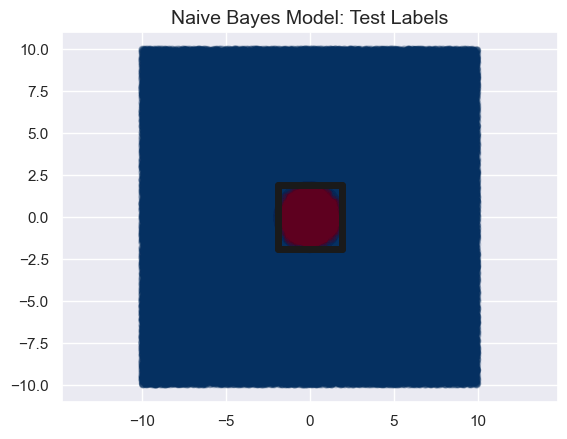

In [4]:
rng = np.random.RandomState(0)
Xnew = [-10, -10] + [20, 20] * rng.rand(200000, 2)  #[-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

if show_fig:
    const_k = 1.9  #hardcoded for this example
    fig, ax = plt.subplots()
    ax.set_title('Naive Bayes Model: Test Labels', size=14)
    # xval = (centers[0][0]+centers[1][0])/2
    #plt.plot([xval,xval],[ylim[0],ylim[1]], 'k-',lw=5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

    plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
    xlim = (-10, 10)
    ylim = (-10, 10)
    plt.plot([-const_k, const_k], [const_k, const_k], 'k-', lw=5)
    plt.plot([-const_k, const_k], [-const_k, -const_k], 'k-', lw=5)
    plt.plot([const_k, const_k], [-const_k, const_k], 'k-', lw=5)
    plt.plot([-const_k, -const_k], [-const_k, const_k], 'k-', lw=5)
    ax.set(xlim=xlim, ylim=ylim)
    plt.axis('equal')
    plt.show()
    fig.savefig('gaussian-NB-neq-var-Test_data.png')